### Quin Daly
### Homework 10.3

In [19]:
import numpy as np
from numpy.random import randint, rand
import matplotlib.pyplot as plt
from scipy.stats import norm

### Exercise 10.10

In [20]:
def Zipf6(f, sigma, y0, n = 10**4):
    def Bernoulli(p):
        return rand() <= p
    t = 0
    y = np.empty(n)
    y[0] = y0
    while t < n-1:
        proposal = np.random.normal(y[t], sigma)
        accept_prob = min(f(proposal)/f(y[t]), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y

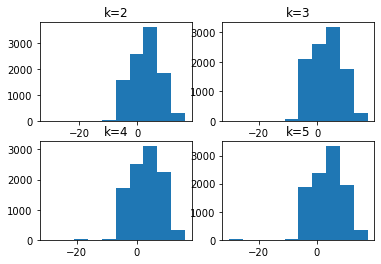

In [34]:
f = lambda s: 4*np.exp((-1*(s+3)**2)/4) + 6*np.exp((-1*(s-5)**2)/32)
sigma = 1
y0 = -30
fig, ax = plt.subplots(2,2)
sol = []
for k in [2,3,4,5]:
    # Find solution for 10^k samples and plot
    sol.append(Zipf6(f, sigma, y0, 10**k))
ax[0,0].hist(sol[0])
ax[0,0].set_title('k=2')
ax[0,1].hist(sol[1])
ax[0,1].set_title('k=3')
ax[1,0].hist(sol[2])
ax[1,0].set_title('k=4')
ax[1,1].hist(sol[3])
ax[1,1].set_title('k=5')
#plt.title('10^'+str(k)+' samples')
plt.show()

### Exercise 10.11

In [36]:
def Zipf11(f, sigma, y0, B, n = 10**4):
    def Bernoulli(p):
        return rand() <= p
    t = 0
    y = np.empty(n+B)
    y[0] = y0
    while t < n-1:
        proposal = np.random.normal(y[t], sigma)
        accept_prob = min(f(proposal)/f(y[t]), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y[:n]

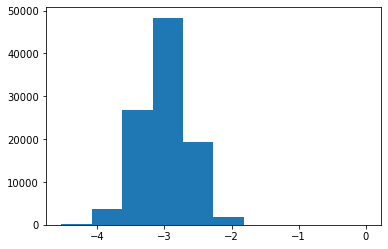

In [43]:
f = lambda s: 4*np.exp((-4*(s+3)**2)) + 6*np.exp((-1*(s-5)**2))
sigma = 1
y0 = 0
# Find solution for 10^k samples and plot
sol = Zipf11(f, sigma, y0, B=10**5, n=10**5)
plt.hist(sol)
#plt.title('10^'+str(k)+' samples')
plt.show()

### Exercise 10.13

Part (i):
Note that the foiling the exponent on the right gives the exponent of the pdf. Therefore, the conditional distribution is normal with mean 4/(1+y^2) and variance 1/(1+y^2).

In [65]:
# Initialize
f = lambda x,y: np.exp(-1*((x**2)*(y**2) + x**2 + y**2 - 8*x - 8*y)/2)
y0 = np.array([0,0])
N = 10**5

# Make Gibbs sampler
def Gibbs(f, sigma, y0, n = 10**4):
    def Bernoulli(p):
        return rand() <= p
    t = 0
    y = np.empty(n)
    y[0] = f(y0[0],y0[1])
    while t < n-1:
        proposal = np.random.normal(y[t], sigma)
        accept_prob = min(f(proposal,1)/f(y[t],1), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y

In [66]:
sol = Gibbs(f, sigma, y0, N)

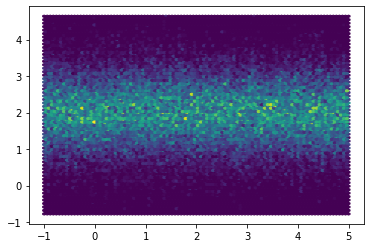

In [71]:
plt.hexbin(np.linspace(-1,5,N),sol)